# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv("SouthCallCenter.csv")

south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [3]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [4]:
south_df.shape

(314, 15)

In [5]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [6]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [7]:
north_df.shape

(245, 15)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [8]:
#Code Used:
names = []
cnt = 0
for i in range(0, len(north_df['Rep ID'])):
    
    if north_df['Rep ID'][i] not in names: 
        
        names.append(north_df['Rep ID'][i])
          
        cnt += 1
  
print("Number of Representatives :",
      cnt)
  
print("Names :",
      names)

Number of Representatives : 9
Names : ['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy', 'Xander']


#### EDA Question 1B:  How many reps are in the South branch?  

In [9]:
#Code Used:
names = []
cnt = 0
for i in range(0, len(south_df['Rep ID'])):
    
    if south_df['Rep ID'][i] not in names: 
        
        names.append(south_df['Rep ID'][i])
          
        cnt += 1
  
print("Number of Representatives :",
      cnt)
  
print("Names :",
      names)

Number of Representatives : 11
Names : ['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy', 'George', 'Helga', 'Josh', 'Sharon']


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [10]:
#Code Used:
north_df_mean = north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()
north_df_mean

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [11]:
#Code Used:
south_df_mean = south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()
south_df_mean

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [12]:
# Code Used:
n_calls = north_df.groupby('Time Block')['Calls'].value_counts().dropna().unstack()
s_calls = south_df.groupby('Time Block')['Calls'].value_counts().dropna().unstack()

In [13]:
print(n_calls, s_calls)

Calls        1
Time Block    
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5 Calls        1
Time Block    
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5


In [14]:
print(n_calls + s_calls)

Calls         1
Time Block     
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = There are 9 reps at the north branch (Brent, Cam, Todd, Duke, Joe, Lilly, Amanda, Andy, and Xander).

- 1b) Reps in the South Branch = There are 11 reps at the south branch (Kate, Eric, Susan, Alice, Sandy, Karl, Randy, George, Helga, Josh, and Sharon).


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in the 'Incoming Wait Time' column in both the north branch dataset and the south branch dataet. The north branch is missing 163 values and the south branch is missing 188 values. Since this is about 60% of each columns' values and this information is important for our analysis, I decided to leave the null values as is so the data is not skewed.

In [15]:
# Code Used
# Add Additional Cells as needed.
north_df.isnull().sum()


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [16]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


<Axes: >

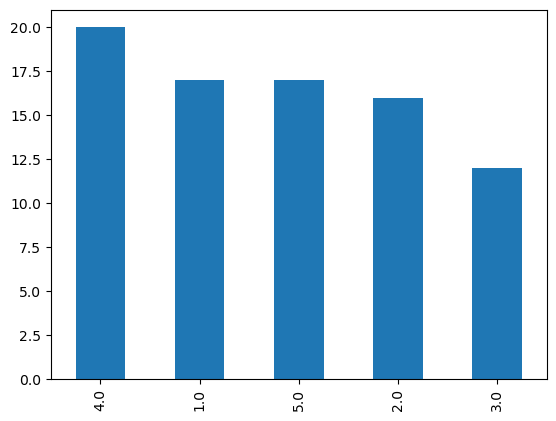

In [17]:
north_df['Incoming Wait Time'].value_counts().plot.bar()

In [18]:
north_df['Incoming Wait Time'].mean()

3.048780487804878

In [19]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [20]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


<Axes: >

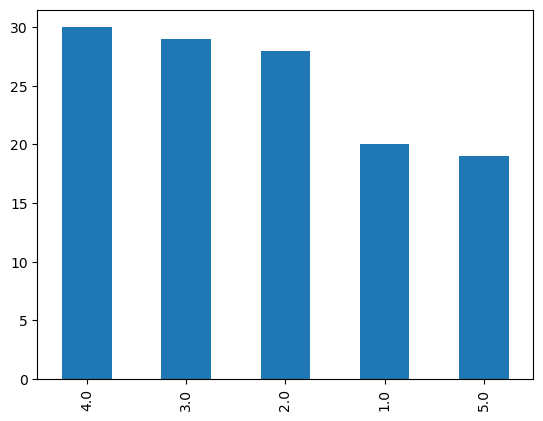

In [21]:
south_df['Incoming Wait Time'].value_counts().plot.bar()

In [22]:
south_df['Incoming Wait Time'].mean()

3.0

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There was one column with the value of "YES" that had an extra space which was skewing the data. I solved this issue by using str.strip() to remove the space. I confirmed that this solved the issue by running .unique to determine if there were two unique values and value counts to confirm as well.

In [23]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].value_counts()


NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [24]:
north_df['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [25]:
north_df['Sale']=north_df['Sale'].str.strip()

In [26]:
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

In [27]:
north_df['Sale'].value_counts()


NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: With the Unnamed column, there were no duplicates showing becuase that column is all unique values. After removing the Unnamed column, there were 2 duplicates in the north call center data and 3 duplicates in the south call center. I initially removed the duplicates from each dataset. After a closer look, the duplicates that returned were not actually duplicates, so I kept them in the dataset.

In [68]:
#Code Used
# Add Additional Cells as needed.
# north_df.duplicated().value_counts()
n_duplicates = north_df[north_df.duplicated()]
n_duplicates.sum()

Unnamed: 0               0.0
Branch                   0.0
Call Purpose             0.0
Time Block               0.0
Incoming or Outgoing     0.0
Queue                    0.0
Rep ID                   0.0
Sale                     0.0
Lost Call                0.0
Abandoned                0.0
Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
Calls                    0.0
dtype: float64

In [69]:
# south_df.duplicated().value_counts()
s_duplicates = south_df[south_df.duplicated()]
s_duplicates.sum()

Unnamed: 0               0.0
Branch                   0.0
Call Purpose             0.0
Time Block               0.0
Incoming or Outgoing     0.0
Queue                    0.0
Rep ID                   0.0
Sale                     0.0
Lost Call                0.0
Abandoned                0.0
Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
Calls                    0.0
dtype: float64

In [30]:
north_df['Unnamed: 0'].value_counts()

0      1
154    1
156    1
157    1
158    1
      ..
86     1
87     1
88     1
89     1
244    1
Name: Unnamed: 0, Length: 245, dtype: int64

In [31]:
south_df['Unnamed: 0'].value_counts()

0      1
206    1
213    1
212    1
211    1
      ..
104    1
103    1
102    1
101    1
313    1
Name: Unnamed: 0, Length: 314, dtype: int64

In [32]:
new_north_df = north_df.drop(columns = ['Unnamed: 0'])
new_north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [33]:
new_north_duplicates = new_north_df[new_north_df.duplicated()]
new_north_duplicates

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [34]:
# new_north_df = new_north_df.drop_duplicates()
# new_north_df.shape

In [35]:
new_south_df = south_df.drop(columns = ['Unnamed: 0'])
new_south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [36]:
new_south_duplicates = new_south_df[new_south_df.duplicated()]
new_south_duplicates

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [37]:
# new_south_df = new_south_df.drop_duplicates()
# new_south_df.shape

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I thought the calls columns was unnecessary because every value is 1, meaning there was 1 call, until reaching the manipulation section. This data is necessary because we need to count the calls for each Rep. Therefore, I did not find any unnecessary data.

In [38]:
#Code Used
# Add Additional Cells as needed.
new_south_df['Calls'].unique()

array([1])

In [39]:
# new_south_df = new_south_df.drop(columns = ['Calls'])
# new_south_df.head()

In [40]:
new_north_df['Calls'].unique()

array([1])

In [41]:
# new_north_df = new_north_df.drop(columns = ['Calls'])
# new_north_df.head()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [42]:
# Create dataframe for the entire company named df

# df = new_north_df.append(new_south_df)
# df.head(500)
df = pd.concat([north_df, south_df])
df.head(500)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,South,Product Support,1:00 PM,Outgoing,D,Kate,NO,0,0,10,3,NaN,4,1
251,251,South,Product Support,1:00 PM,Outgoing,C,Susan,NO,0,0,10,3,NaN,3,1
252,252,South,Product Support,1:00 PM,Outgoing,D,Karl,YES,0,0,11,1,NaN,2,1
253,253,South,Product Support,1:00 PM,Outgoing,C,Sharon,NO,0,0,8,1,NaN,3,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 Calls
- South Branch = Eric, 35 Calls


In [43]:
# Code Used
# Add Additional Cells as needed.
rep_id_grouped = df.groupby('Rep ID')
rep_id_grouped.first()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,,,,,,
Alice,3,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,12,1,1.0,3,1
Amanda,11,North,Product Support,4:00 PM,Incoming,A,NO,0,0,10,3,1.0,2,1
Andy,17,North,Complaint,2:00 PM,Incoming,A,NO,0,1,9,3,2.0,4,1
Brent,0,North,Complaint,9:00 AM,Incoming,B,NO,0,1,9,2,1.0,4,1
Cam,1,North,Sales Support,11:00 AM,Incoming,A,NO,0,0,11,1,1.0,3,1
Duke,5,North,Product Support,2:00 PM,Incoming,B,NO,0,0,12,2,1.0,2,1
Eric,1,South,Sales Support,10:00 AM,Incoming,C,NO,0,0,8,2,1.0,4,1
George,9,South,Product Support,3:00 PM,Incoming,D,NO,0,0,8,3,1.0,4,1
Helga,10,South,Product Support,3:00 PM,Incoming,D,NO,0,0,9,1,1.0,3,1


In [44]:
sum_rep_id=rep_id_grouped.agg('sum')
sum_rep_id.sort_values(["Calls"], ascending = False)

/var/folders/12/rmr93cmn247fr028ldm1j3cr0000gn/T/ipykernel_28632/1831510825.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_rep_id=rep_id_grouped.agg('sum')


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
Lilly,3375,0,2,307,59,37.0,88,30
Todd,4252,1,0,296,58,21.0,97,29
Duke,2999,2,0,292,56,39.0,85,29
George,4620,0,0,298,53,41.0,87,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide =1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, the south branch and company wide fall under the optimal range.

In [45]:
# Code Used
# Add Additional Cells as needed.
abandoned = north_df['Abandoned'].agg('sum')
calls = north_df['Calls'].agg('sum')
print(abandoned, calls)

7 245


In [46]:
avg_abandoned_north = (abandoned/calls)*100
avg_abandoned_north.round(2)

2.86

In [47]:
abandoned_south = south_df['Abandoned'].agg('sum')
calls_south = south_df['Calls'].agg('sum')
print(abandoned_south, calls_south)

4 314


In [48]:
avg_abandoned_south = (abandoned_south/calls_south)*100
avg_abandoned_south.round(2)

1.27

In [49]:
abandoned_both = df['Abandoned'].agg('sum')
calls_both = df['Calls'].agg('sum')
print(abandoned_both, calls_both)

11 559


In [50]:
avg_abandoned_both = (abandoned_both/calls_both)*100
avg_abandoned_both.round(2)

1.97

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls answered within 2 seconds, 82 calls with incoming wait time recorded.
- South Branch = 38.1%, 48 calls answered within 2 seconds, 126 calls with incoming wait time recorded.
- Company Wide = 38.94%, 81 calls answered within 2 seconds, 208 calls with incoming wait time recorded.

In [65]:
# Code Used
# Add Additional Cells as needed.
wait_time_north = north_df['Incoming Wait Time']<=2
wait_time_north.value_counts()

False    212
True      33
Name: Incoming Wait Time, dtype: int64

In [67]:
num_of_calls_north = north_df['Incoming Wait Time'].count()
num_of_calls_north

82

In [53]:
avg_calls_north = (wait_time_north.sum()/num_of_calls_north)*100
avg_calls_north.round(2)

40.24

In [54]:
wait_time_south = south_df['Incoming Wait Time']<=2
wait_time_south.value_counts(0)

False    266
True      48
Name: Incoming Wait Time, dtype: int64

In [55]:
num_of_calls_south = south_df['Incoming Wait Time'].count()
num_of_calls_south

126

In [56]:
avg_calls_south = (wait_time_south.sum()/num_of_calls_south.sum())*100
avg_calls_south.round(2)

38.1

In [57]:
wait_time_both = df['Incoming Wait Time']<=2
wait_time_both.value_counts(0)

False    478
True      81
Name: Incoming Wait Time, dtype: int64

In [58]:
num_of_calls_both = df['Incoming Wait Time'].count()
num_of_calls_both

208

In [59]:
avg_calls_both =(wait_time_both.sum()/num_of_calls_both.sum())*100
avg_calls_both.round(2)

38.94

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [70]:
# Code Used 
north_avg_wait = north_df['Incoming Wait Time'].agg('mean')
south_avg_wait = south_df['Incoming Wait Time'].agg('mean')
both_avg_wait = df['Incoming Wait Time'].agg('mean')
print(north_avg_wait, south_avg_wait, both_avg_wait)

3.048780487804878 3.0 3.019230769230769


In [71]:
north_avg_wait.round(2)

3.05

In [72]:
south_avg_wait.round(2)

3.0

In [73]:
both_avg_wait.round(2)

3.02

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here: The average abandonment rate per queue is 2.3%

> Chart style you chose and why: I chose a bar chart because I felt is would be the clearest way to show the difference between the 4 averages.

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


/var/folders/12/rmr93cmn247fr028ldm1j3cr0000gn/T/ipykernel_2328/1372465907.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


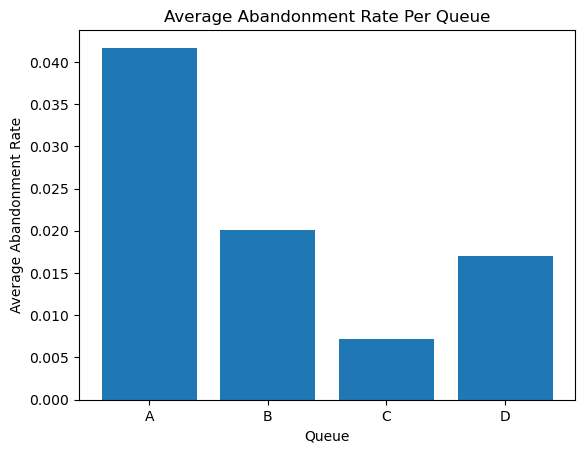

In [60]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(abandonment_rates)
#Your Code Here:

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

plt.bar(range(len(abandonment_rates)), values, tick_label=names)
plt.title('Average Abandonment Rate Per Queue',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Average Abandonment Rate',color = 'black')
plt.show()



In [225]:
queue=df.groupby(["Branch", 'Queue']).count()

queue


Unnamed: 0  Call Purpose  Time Block  Incoming or Outgoing  \
Branch Queue                                                               
North  A              96            96          96                    96   
       B             149           149         149                   149   
South  C             138           138         138                   138   
       D             176           176         176                   176   

              Rep ID  Sale  Lost Call  Abandoned  Busy Minutes  \
Branch Queue                                                     
North  A          96    96         96         96            96   
       B         149   149        149        149           149   
South  C         138   138        138        138           138   
       D         176   176        176        176           176   

              Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Queue                                                                 
North  A                     96                  36                     96   
       B                    149                  46                    149   
South  C                    138                  57                    138   
       D                    176                  69                    176   

              Calls  
Branch Queue         
North  A         96  
       B        149  
South  C        138  
       D        176

In [229]:
rep_queue = df.groupby(['Queue', 'Rep ID']).count()
rep_queue

Unnamed: 0  Branch  Call Purpose  Time Block  \
Queue Rep ID                                                 
A     Amanda          23      23            23          23   
      Andy            23      23            23          23   
      Cam             24      24            24          24   
      Joe             26      26            26          26   
B     Brent           37      37            37          37   
      Duke            29      29            29          29   
      Lilly           30      30            30          30   
      Todd            29      29            29          29   
      Xander          24      24            24          24   
C     Alice           20      20            20          20   
      Eric            35      35            35          35   
      Sandy           32      32            32          32   
      Sharon          25      25            25          25   
      Susan           26      26            26          26   
D     George          29      29            29          29   
      Helga           31      31            31          31   
      Josh            26      26            26          26   
      Karl            28      28            28          28   
      Kate            29      29            29          29   
      Randy           33      33            33          33   

              Incoming or Outgoing  Sale  Lost Call  Abandoned  Busy Minutes  \
Queue Rep ID                                                                   
A     Amanda                    23    23         23         23            23   
      Andy                      23    23         23         23            23   
      Cam                       24    24         24         24            24   
      Joe                       26    26         26         26            26   
B     Brent                     37    37         37         37            37   
      Duke                      29    29         29         29            29   
      Lilly                     30    30         30         30            30   
      Todd                      29    29         29         29            29   
      Xander                    24    24         24         24            24   
C     Alice                     20    20         20         20            20   
      Eric                      35    35         35         35            35   
      Sandy                     32    32         32         32            32   
      Sharon                    25    25         25         25            25   
      Susan                     26    26         26         26            26   
D     George                    29    29         29         29            29   
      Helga                     31    31         31         31            31   
      Josh                      26    26         26         26            26   
      Karl                      28    28         28         28            28   
      Kate                      29    29         29         29            29   
      Randy                     33    33         33         33            33   

              Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Queue Rep ID                                                                 
A     Amanda                 23                   5                     23   
      Andy                   23                  10                     23   
      Cam                    24                  11                     24   
      Joe                    26                  10                     26   
B     Brent                  37                   8                     37   
      Duke                   29                  14                     29   
      Lilly                  30                  12                     30   
      Todd                   29                   6                     29   
      Xander                 24                   6                     24   
C     Alice                  2

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose to use two bar graphs to represent the service level percentage and average speed of answer for each rep in the North Branch. I chose to use two because both graphs are represent a different type of data (time and percentage). The bar graph is the clearest way to compare each rep and quickly see the differences between them.

In [61]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()

# .reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:



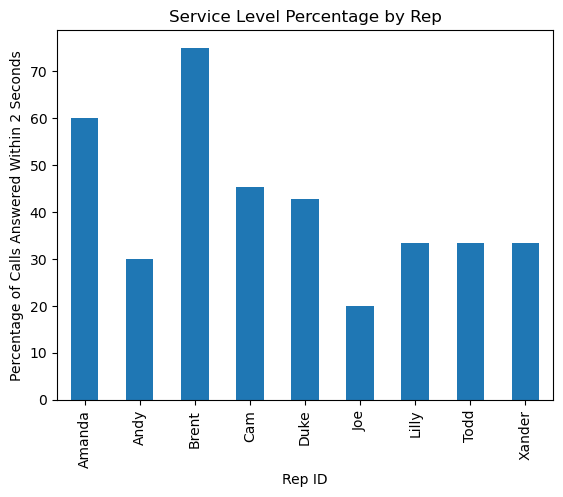

In [230]:
bar_north_service_level = service_level['Service Level %'].plot(kind = 'bar')
plt.title('Service Level Percentage by Rep',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.ylabel('Percentage of Calls Answered Within 2 Seconds',color = 'black')
plt.show()

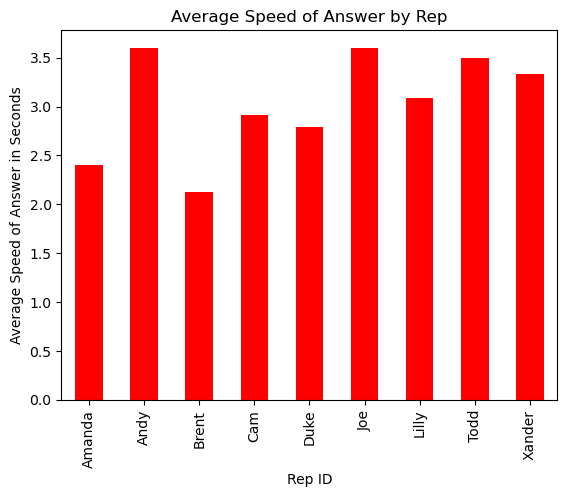

In [63]:
bar_north_plt = north_plt.plot(kind = 'bar', color = 'red')
plt.title('Average Speed of Answer by Rep',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.ylabel('Average Speed of Answer in Seconds',color = 'black')
bar_north_plt.get_legend().remove()
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose to use doughnut charts to represent the amount of incoming and outgoing calls for each call purpose. I chose this type of chart becuase it is a good way to compare the percentage of each type of call.

In [197]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose") 
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:



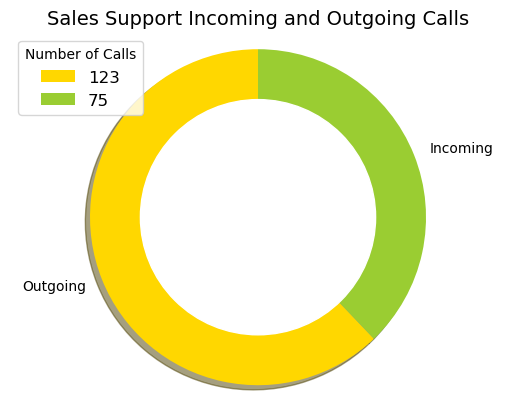

In [192]:

circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
labels = ['Outgoing','Incoming']
plt.pie(purpose_counts['Sales Support'], shadow = True, colors = colors, startangle = 90, labels = labels)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(purpose_counts['Sales Support'], fontsize = 12, loc = 'upper left', title = 'Number of Calls')
plt.title('Sales Support Incoming and Outgoing Calls', color = 'black', fontsize = 14)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

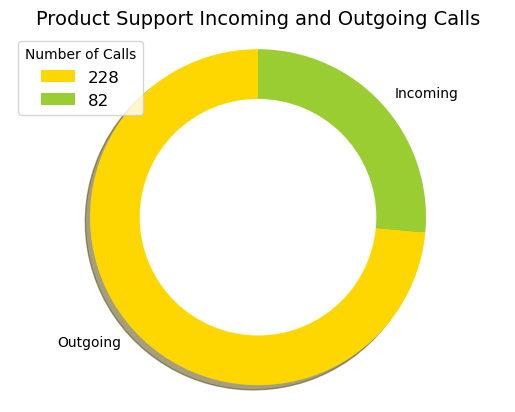

In [198]:
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
labels = ['Outgoing','Incoming']
plt.pie(purpose_counts['Product Support'], shadow = True, colors = colors, startangle = 90, labels = labels)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(purpose_counts['Product Support'], fontsize = 12, loc = 'upper left', title = 'Number of Calls')
plt.title('Product Support Incoming and Outgoing Calls', color = 'black', fontsize = 14)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

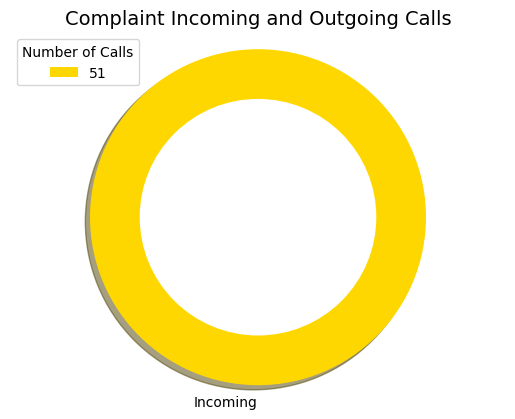

In [196]:
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
labels = ['Incoming']
plt.pie(purpose_counts['Complaint'], shadow = True, colors = colors, startangle = 90, labels = labels)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(purpose_counts['Complaint'], fontsize = 10, loc = 'upper left', title = 'Number of Calls')
plt.title('Complaint Incoming and Outgoing Calls', color = 'black', fontsize = 14)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
Looking at the average abandonment rate per queue, we can see that the A and B queues have a higher abandonment rate than C and D. This tells us that the customers calling the North branch are hanging up more becuase of long wait times. Therefore, we know the South branch is operating more efficiently.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North branch has 9 reps, while the South branch has 11. We can see from the average abandonment rates that the South branch is operating more efficiently. Therefore, I believe the North branch would benefit most from extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
I believe it would be beneficial to know the duration of each call and call purpose. This would give us more insight into why there might be higher wait times for customers. We could also analyze if there is a correlation between call purpose and the duration of the call. This information could potentially help the branches run more efficiently. If they were able to predict how long a call might take based on call purpose, they could direct other calls to Reps that will have a shorter call duration.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: